# Airline Analysis

Project Prompt: You work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

The data includes:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

## Univariate Analysis

1. Review coach ticket prices

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
flight = pd.read_csv("flight.csv")
flight.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


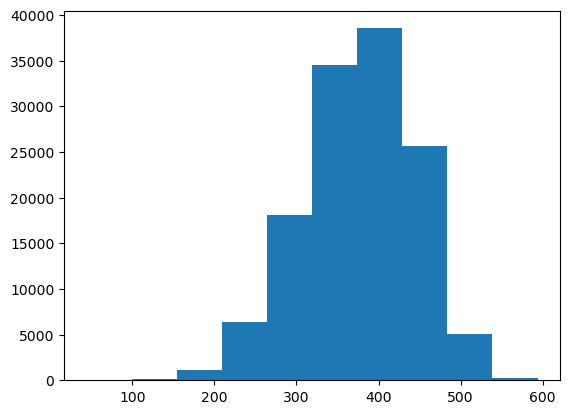

44.415
593.635
376.58525308213905


<Figure size 640x480 with 0 Axes>

In [5]:
## Task 1
plt.hist(flight.coach_price)
plt.show()
plt.clf()
print(np.min(flight.coach_price))
print(np.max(flight.coach_price))
print(np.mean(flight.coach_price))

2. Visualize the coach ticket prices for flights that are 8 hours long.

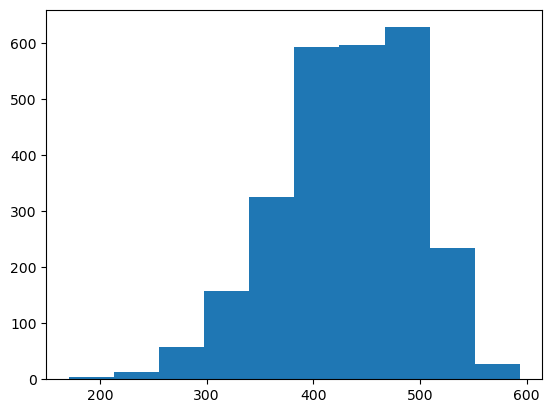

170.77
593.635
431.834377372817


<Figure size 640x480 with 0 Axes>

In [6]:
## Task 2
plt.hist(flight.coach_price[flight.hours == 8])
plt.show()
plt.clf()
print(np.min(flight.coach_price[flight.hours == 8]))
print(np.max(flight.coach_price[flight.hours == 8]))
print(np.mean(flight.coach_price[flight.hours == 8]))

3. How are flight delay times distributed?

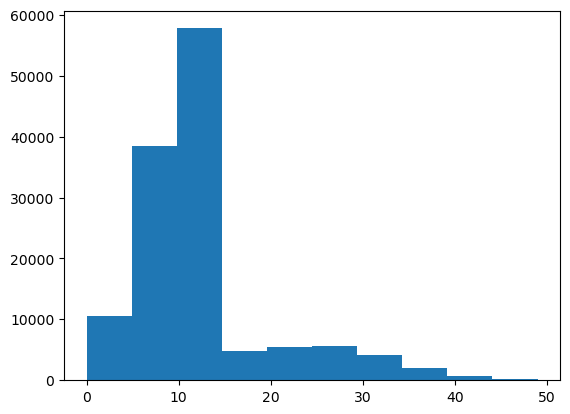

0
1560
12.009988276308889


<Figure size 640x480 with 0 Axes>

In [7]:
## Task 3
plt.hist(flight.delay[flight.delay < 50])
plt.show()
plt.clf()
print(np.min(flight.delay))
print(np.max(flight.delay))
print(np.mean(flight.delay[flight.delay < 50]))


## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices.

/Users/Ryneika/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


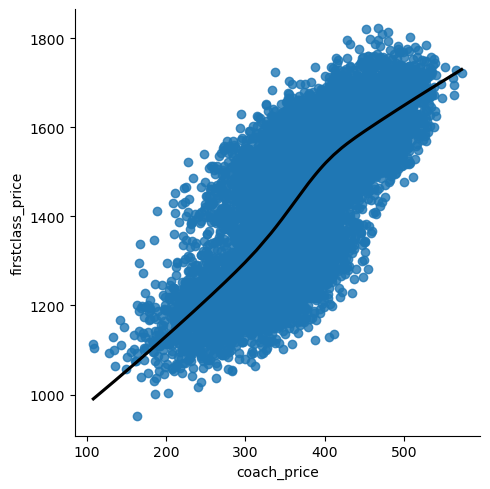

<Figure size 640x480 with 0 Axes>

In [8]:
## Task 4
perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))

sns.lmplot(x = "coach_price", y = "firstclass_price", data = flight_sub, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf()

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi?

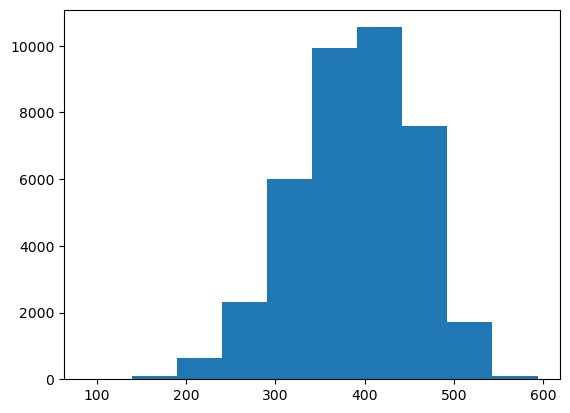

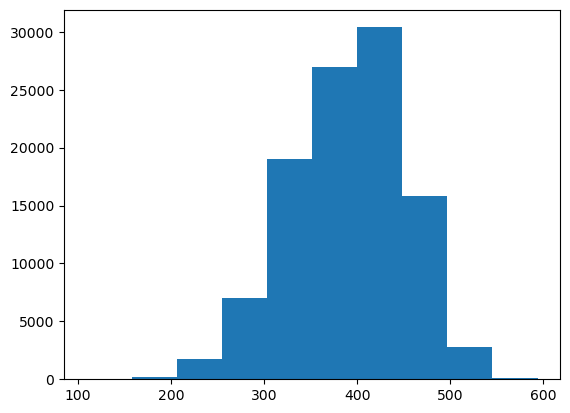

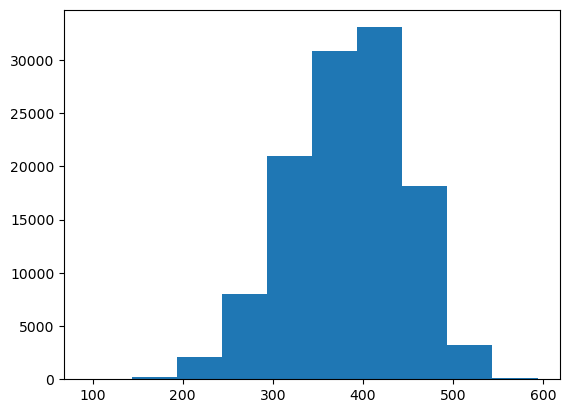

<Figure size 640x480 with 0 Axes>

In [9]:
## Task 5
plt.hist(flight.coach_price[flight.inflight_meal == 'Yes'])
plt.show()
plt.clf()
plt.hist(flight.coach_price[flight.inflight_entertainment == 'Yes'])
plt.show()
plt.clf()
plt.hist(flight.coach_price[flight.inflight_wifi == 'Yes'])
plt.show()
plt.clf()

6. How does the number of passengers change in relation to the length of flights?

/Users/Ryneika/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


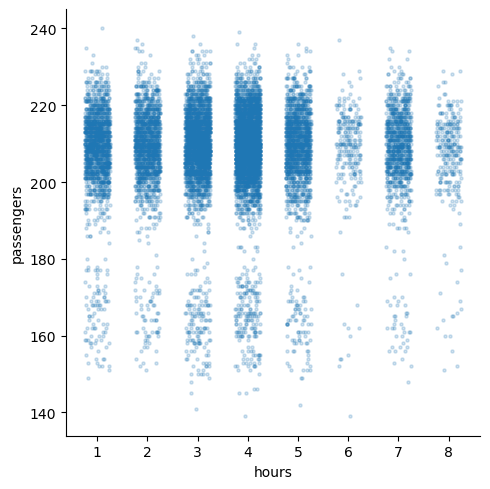

<Figure size 640x480 with 0 Axes>

In [10]:
## Task 6
sns.lmplot(x = "hours", y = "passengers", data = flight_sub, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2}, fit_reg = False)
plt.show()
plt.clf()


## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

/Users/Ryneika/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


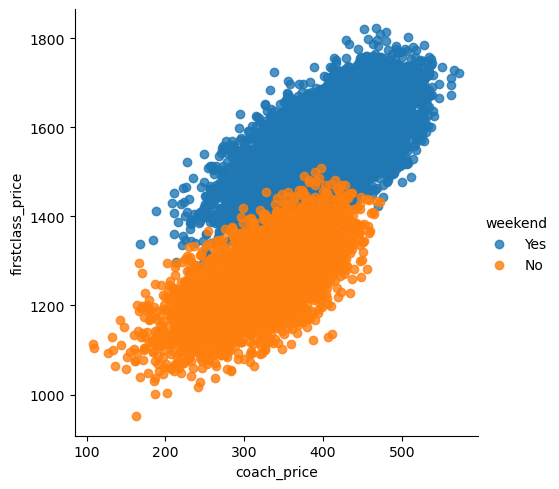

<Figure size 640x480 with 0 Axes>

In [11]:
## Task 7
sns.lmplot(x ='coach_price', y='firstclass_price', hue = 'weekend', data = flight_sub, fit_reg= False)
plt.show()
plt.clf()


8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

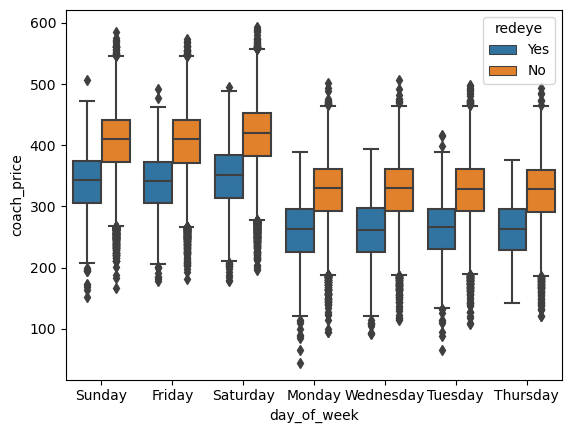

<Figure size 640x480 with 0 Axes>

In [12]:
## Task 8
sns.boxplot(x = "day_of_week", y = "coach_price", hue = "redeye", data = flight)
plt.show()
plt.clf()
